# Template Model Classification - Dataset X_train

In [1]:
#import semua library yg bakalan dipake di sini, biar rapih
#kalo kurang tambahin aja yaa wkwkwk

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier


from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, precision_score, recall_score, f1_score, accuracy_score, auc, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

from xgboost import XGBClassifier

# IMPORT & SPLIT DATASET 

In [2]:
df_train_x_train = pd.read_csv('processed_dataset/Train/processed_Train_X_train.csv')
df_test_x_train = pd.read_csv('processed_dataset/Test/processed_Test_X_train.csv')

In [ ]:
df_train_x_train.info()

In [ ]:
df_test_x_train.info()

In [3]:
#split X dan Y 
#moga2 split train sama testnya bener ya KWKWKWKWK

X_train = df_train_x_train.drop('arrived_late', axis = 1)
y_train = df_train_x_train['arrived_late']
X_test = df_test_x_train.drop('arrived_late', axis = 1)
y_test = df_test_x_train['arrived_late']

In [5]:
X_test

,Customer_care_calls,Discount_offered,Weight_in_gms,profit,profit_minus_discount,shipping_cost,is_expensive,is_important,cust_frequency,Warehouse_block:B,Warehouse_block:C,Warehouse_block:D,Warehouse_block:F,Mode_of_Shipment:Road,Mode_of_Shipment:Ship,Gender
0,-0.043121,2.826257,-0.947457,1.202317,-3.923953,-0.541843,1,0,0,0,1,0,0,0,1,0
1,2.591731,-0.704008,-1.106567,1.785060,0.733524,-0.554349,1,0,1,0,0,0,0,0,1,0
2,-0.921405,-0.704008,1.351073,-1.482465,0.661920,0.411240,0,0,0,0,0,0,0,1,0,1
3,0.835163,-0.642073,0.401308,-0.504289,0.626802,0.131279,0,0,1,0,0,0,0,1,0,1
4,-0.921405,-0.704008,1.010210,-1.274343,0.666481,-0.387960,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,0.835163,-0.208532,0.709125,-1.857086,0.359387,-0.411627,0,0,2,0,1,0,0,0,1,0
2196,0.835163,-0.270466,-1.274245,0.369826,0.217243,-0.362622,0,0,2,0,0,1,0,1,0,0
2197,-0.043121,-0.765942,0.505953,0.120079,0.762713,-0.427597,0,0,1,0,0,1,0,0,1,0
2198,1.713447,-0.704008,-1.566763,0.910945,0.714369,-0.590523,1,0,1,0,0,1,0,0,1,0


# FUNCTIONS

In [6]:
def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
#     print("AUC (test-label): %.2f" % roc_auc_score(y_test, y_pred))
#     print("AUC (train-label): %.2f" % roc_auc_score(y_train, y_pred_train))
    print('\n------------------------\n')
    print(classification_report(y_test, y_pred))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')
    
#feature importance untuk SVM
def feature_plot(classifier, feature_names, top_features=8):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    plt.figure(figsize=(18, 7))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(0, 0 + 2 * top_features), feature_names[top_coefficients], rotation=45, ha='right')
    plt.show()

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [7]:
def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression(penalty='l2', C=c)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(C, train_scores, label='Train')
    plt.plot(C, test_scores, label='Test')
    plt.legend()
    plt.show()

# AdaBoost - Best Fit

In [8]:
ada = AdaBoostClassifier()

In [9]:
ada.fit(X_train,y_train)
y_pred = ada.predict(X_test)
eval_classification(ada)

Accuracy (Test Set): 0.68
Precision (Test Set): 0.82
Recall (Test Set): 0.59
F1-Score (Test Set): 0.69
AUC (test-proba): 0.76
AUC (train-proba): 0.76

------------------------

              precision    recall  f1-score   support

           0       0.57      0.81      0.67       887
           1       0.82      0.59      0.69      1313

    accuracy                           0.68      2200
   macro avg       0.70      0.70      0.68      2200
weighted avg       0.72      0.68      0.68      2200



In [ ]:
show_feature_importance(ada)

In [ ]:
'''important_feature = ['Weight_in_gms', 
                     'shipping_cost', 
                     'profit', 
                     'profit_minus_discount', 
                     'Discount_offered', 
                     'is_important', 
                     'cust_frequency', 
                     'arrived_late']

train_fs = df_train_x_train[important_feature]
test_fs = df_test_x_train[important_feature]
train_fs.to_csv('train_fs.csv', index = False)
test_fs.to_csv('test_fs.csv', index = False)'''

## Hasil adaboost lumayan, coba kita cek gridsearch

In [10]:
from sklearn.metrics import precision_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

'''def precision_0(y, y_pred, **kwargs):
    return precision_score(y, y_pred, pos_label = 0)'''

prec_0 = make_scorer(precision_score, pos_label = 0)

grid = dict()
grid['n_estimators'] = [10,50,100,500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1]
grid['algorithm'] = ['SAMME', 'SAMME.R']

grid

{'n_estimators': [10, 50, 100, 500],
 'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1],
 'algorithm': ['SAMME', 'SAMME.R']}

In [ ]:
#precission 0
grid_search = GridSearchCV(estimator=AdaBoostClassifier(),param_grid= grid, n_jobs=-1, cv=10, scoring=prec_0)
grid_result = grid_search.fit(X_train,y_train)
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

In [ ]:
#recall 1
grid_search = GridSearchCV(estimator=AdaBoostClassifier(),param_grid= grid, n_jobs=-1, cv=10, scoring='recall')
grid_result = grid_search.fit(X_train,y_train)
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

In [12]:
#roc_auc
grid_search = GridSearchCV(estimator=AdaBoostClassifier(),param_grid= grid, n_jobs=-1, cv=10, scoring='roc_auc')
grid_result_auc = grid_search.fit(X_train,y_train)
print('Best: %f using %s' % (grid_result_auc.best_score_, grid_result_auc.best_params_))

Best: 0.745967 using {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 500}


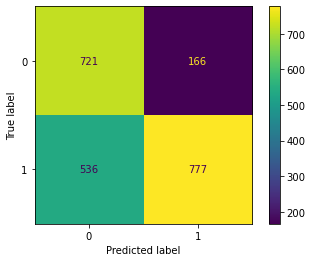

In [13]:
#confusion matrix after tuning
y_pred = grid_result_auc.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.81      0.67       887
           1       0.82      0.59      0.69      1313

    accuracy                           0.68      2200
   macro avg       0.70      0.70      0.68      2200
weighted avg       0.72      0.68      0.68      2200



In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.datasets import make_classification

clf = AdaBoostClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [ ]:
X_test

In [ ]:
from sklearn.metrics import plot_confusion_matrix

def confusion_matrix(Model, X_train, y_train, X_test, y_test):
    model = Model
    plot_confusion_matrix(model.fit(X_train, y_train), X_test, y_test,
                     display_labels=['on_time','late'], cmap = 'Oranges', 
                     values_format='.0f')  
    plt.grid(False)
    plt.show()



In [ ]:
confusion_matrix(grid_result_auc, X_train, y_train, X_test, y_test)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

# Logistic Regression (Riyan)

In [ ]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
eval_classification(model)

In [ ]:
show_feature_importance(model)
# gak bisa pake show_feature_importance, temen" ada opsi lain?

# Decision Tree (Arsya)

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)
eval_classification(dt)

In [ ]:
show_feature_importance(dt)

# Random Forest (Edo)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
eval_classification(rf)

In [ ]:
show_feature_importance(rf)

# Support Vector Classification - Best Fit

In [ ]:
svc = SVC(kernel='linear',probability=True)
svc.fit(X_train,y_train)


y_pred = svc.predict(X_test)
eval_classification(svc)

Model dinilai telah mencapai best-fit, karena memiliki nilai AUC pada test & train yang tidak berbeda.

Team mencari model yang dapat mengurangi nilai yang diprediksi akan 'on time' namun aktualnya telat. Hal tersebut dapat dilihat dari nilai precision terhadap '0' atau nilai recall terhadap '1'.
Diketahui bahwa nilai precision terhadap '0' adalah 0.53 dan precision 0.42

In [ ]:
features_names= X_train.columns.values
features_names

In [ ]:
feature_plot(svc, features_names)

dalam model menggunakan algoritma SVC, features discount_offered memiliki koefisien positive paling bermakna terhadap target. 

# K-Nearest Neighbor

In [ ]:
knn = KNeighborsClassifier()

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
eval_classification(knn)

# XGBoost (Agas)

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)

eval_classification(xgb)

In [ ]:
show_feature_importance(xgb)